# **Homework 8: Supervised Learning Review**
---

### **Description**

In this week's homework, we will review everything we have seen so far this year. This is your chance to clarify any points of confusion and ultimately ensure your comfort with the fundamentals of supervised machine learning from exploratory data analysis to evaluating linear regression models.

<br>

### **Structure**

**Part 1**: [Exploratory Data Analysis](#p1)
>
> **Part 1.1**: [Exploring and Cleaning Data](#p1.1)
>
> **Part 1.2**: [Visualizing Data](#p1.2)
>
**Part 2**: [Modeling `LV ActivePower (kW)`](#p2)
>
> **Part 2.1**: [Using the Data as Is](#p2.1)
>
> **Part 2.2**: [Attempting to Improve the Model](#p2.2)
>

<br>

### **Learning Objectives**

By the end of this homework, you will:
* Understand how to perform exploratory data analysis before applying ML.
* Understand how to implement and evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)


<br>

**Run the code below before continuing.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---


**Run the code cell below to create the DataFrame.**

In [ ]:
power_df = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/wind%20generator%20power/power%20-%20T1.csv.csv')

<a name="p1.1"></a>

---
### **Part 1.1: Exploratoring and Cleaning Data**
---

#### **Problem #1.1.1**

Using `.head()`, determine how many variables are included in this dataset.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
power_df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 0:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 0:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 0:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 0:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 0:40,380.650696,5.577941,491.702972,265.674286


#### **Problem #1.1.2**

Determine if there are any null values in this dataset and, if so, drop the rows they are in.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
power_df.isna().any()

Date/Time                        False
LV ActivePower (kW)               True
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)     True
Wind Direction (°)                True
dtype: bool

In [ ]:
power_df = power_df.dropna(how = 'any')

#### **Problem #1.1.3**

Determine if there are any duplicate values in this dataset and, if so, drop the rows they are in.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
power_df.duplicated().any()

True

In [ ]:
power_df = power_df.drop_duplicates()

#### **Problem #1.1.4**

It is not possible in this case for the power generated to be negative. Check if there are any entries where `LV ActivePower (kW)` is negative and, if so, drop the rows they are in.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
power_df[power_df['LV ActivePower (kW)'] < 0].count()

Date/Time                        57
LV ActivePower (kW)              57
Wind Speed (m/s)                 57
Theoretical_Power_Curve (KWh)    57
Wind Direction (°)               57
dtype: int64

In [ ]:
power_df = power_df[power_df['LV ActivePower (kW)'] >= 0]

#### **Problem #1.1.5**

After potentially dropping rows above, determine how many data points remain in the dataset.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50473 entries, 0 to 50535
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50473 non-null  object 
 1   LV ActivePower (kW)            50473 non-null  float64
 2   Wind Speed (m/s)               50473 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50473 non-null  float64
 4   Wind Direction (°)             50473 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
power_df.shape

(50473, 5)

In [ ]:
len(power_df)

50473

#### **Problem #1.1.6**

Using pandas methods, determine the following statistics about this dataset:
* Average of each variable.
* Minimum of each variable.
* Maximum of each variable.
* Standard Deviation of each variable.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
power_df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50473.000000,50473.000000,50473.000000,50473.000000
mean,1309.161489,7.563317,1493.846082,123.648102
std,1312.463427,4.226509,1367.885865,93.446383
min,0.000000,0.000000,0.000000,0.000000
25%,52.740540,4.210382,163.084179,49.304878
50%,828.006714,7.111886,1067.161300,73.660377
75%,2484.364014,10.303410,2966.774233,201.684006
max,3618.732910,25.206011,3600.000000,359.997589


#### **Problem #1.1.7**

To finish our initial data exploration, let's look at the `Date/Time` variable. Specifically,

1. Look at the first 10 rows of this variable and determine the relationship between this variable and `power_df.index`.
1. Determine how many data points fit into one day.
1. Determine how many days are contained in this dataset.

##### **1. Look at the first 10 rows of this variable and determine the relationship between this variable and `power_df.index`.**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
power_df['Date/Time'].head(10)

0    01 01 2018 0:00
1    01 01 2018 0:10
2    01 01 2018 0:20
3    01 01 2018 0:30
4    01 01 2018 0:40
5    01 01 2018 0:50
6    01 01 2018 1:00
7    01 01 2018 1:10
8    01 01 2018 1:20
9    01 01 2018 1:30
Name: Date/Time, dtype: object

##### **2. Determine how many data points fit into one day.**

Specifically, find the value for `day_len` such that the code below prints out up to `02 01 2018 0:00` at the end.

In [ ]:
day_len = # COMPLETE THIS CODE

power_df['Date/Time'].iloc[0:day_len + 1]

###### **Solution**

In [ ]:
day_len = 144 # (24 hours per day * 60 minutes per hour) / (10 minutes per row)

power_df['Date/Time'].iloc[0:day_len + 1]

0       01 01 2018 0:00
1       01 01 2018 0:10
2       01 01 2018 0:20
3       01 01 2018 0:30
4       01 01 2018 0:40
             ...       
141    01 01 2018 23:20
142    01 01 2018 23:30
143    01 01 2018 23:40
144    01 01 2018 23:50
145     02 01 2018 0:00
Name: Date/Time, Length: 145, dtype: object

##### **3. Determine how many days are contained in this dataset.**


**Hint**: Use the variable you created above, `day_len`. Be careful about how you approach this though! If you dropped any null values, there may be missing times.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
len(power_df) / day_len

350.50694444444446

<a name="p1.2"></a>

---
### **Part 1.2: Visualizing Data**
---

Make sure you include proper labels and consider adjusting the figure size, color, and other aspects of the visuals to make them as clear as possible.

#### **Problem #1.2.1**

Plot `LV ActivePower (kW)` over time, using `power_df.index` as the x axis representing time.

In [ ]:
start = # COMPLETE THIS CODE
end = # COMPLETE THIS CODE

x = # COMPLETE THIS CODE
y = # COMPLETE THIS CODE

plt.figure(figsize = (30, 8))
plt.# COMPLETE THIS CODE

plt.xlabel(# COMPLETE THIS CODE
plt.ylabel(# COMPLETE THIS CODE
plt.title(# COMPLETE THIS CODE

plt.show()

##### **Solution**

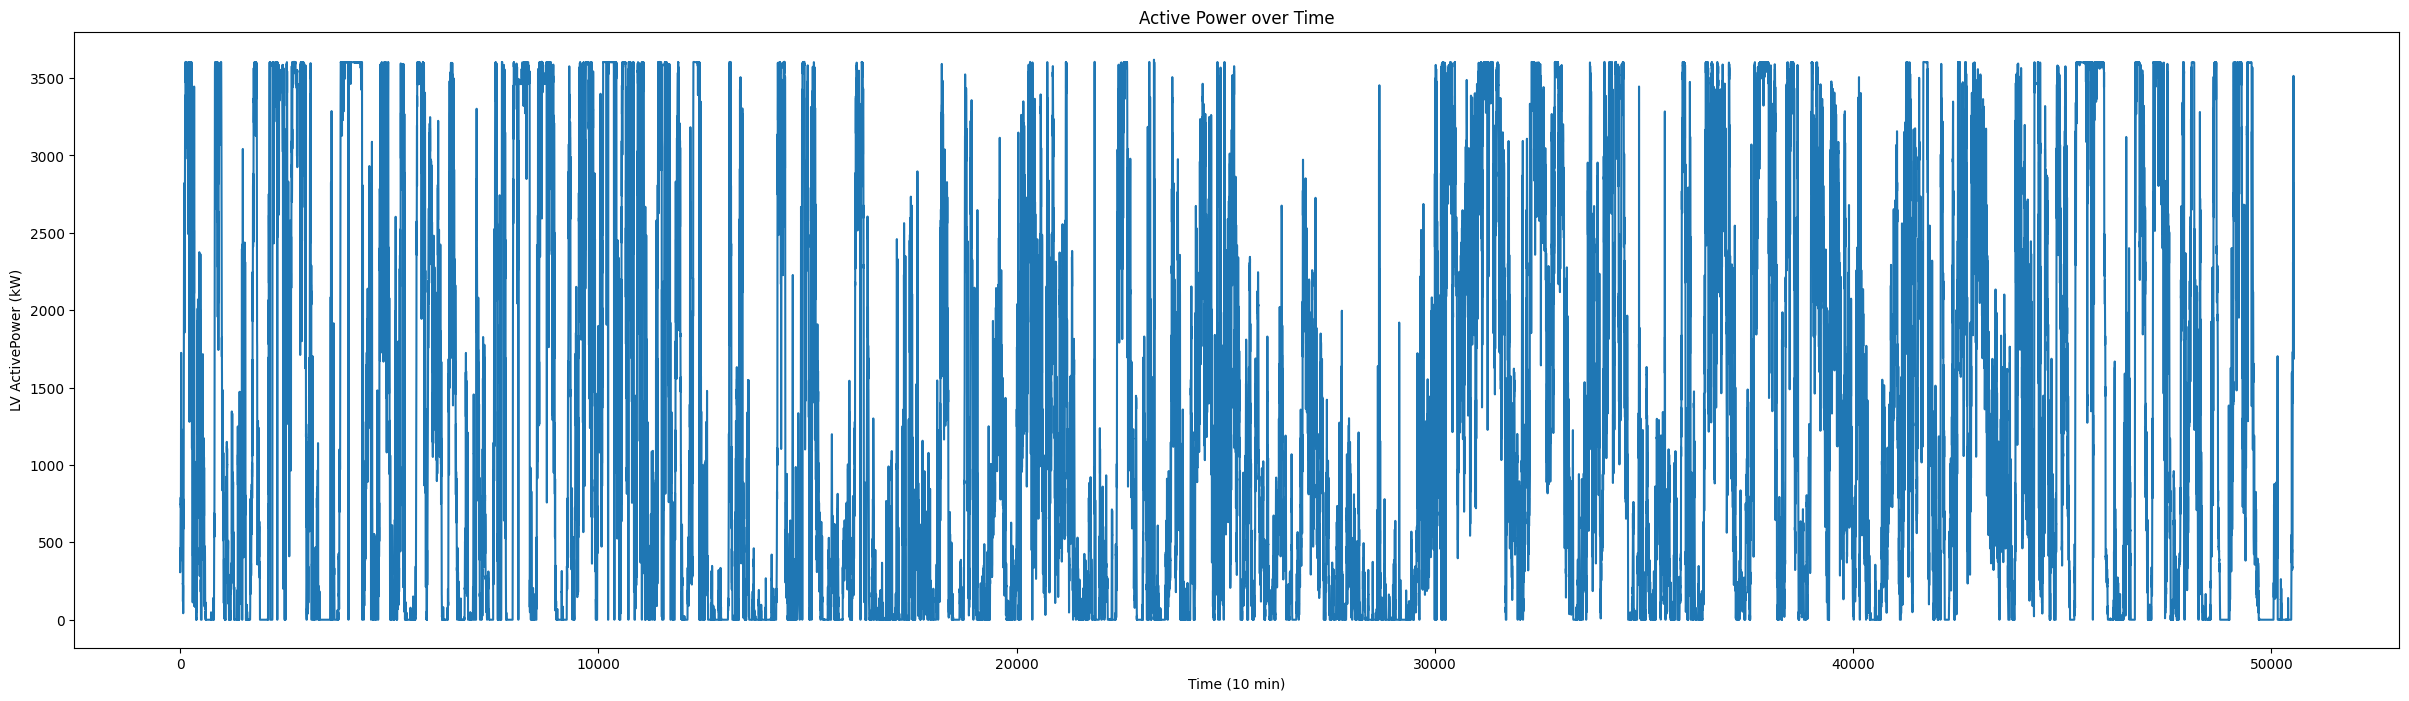

In [ ]:
plt.figure(figsize = (30, 8))
plt.plot(power_df.index, power_df['LV ActivePower (kW)'])

plt.xlabel('Time (10 min)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Active Power over Time')

plt.show()

#### **Problem #1.2.2**

The plot above contains a *lot* of data and it can be hard to really see any patterns in it. In the space below, create the same plot, but only for the first day's worth of data. **NOTE**: Do not worry about missing/dropped rows, simply use a full 24 hours worth of data.

<br>

**Hint**: Use the `day_len` variable you created in the section above.

In [ ]:
start = # COMPLETE THIS CODE
end = # COMPLETE THIS CODE

x = # COMPLETE THIS CODE
y = # COMPLETE THIS CODE

plt.figure(figsize = (30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel(# COMPLETE THIS CODE
plt.ylabel(# COMPLETE THIS CODE
plt.title(# COMPLETE THIS CODE

plt.show()

##### **Solution**

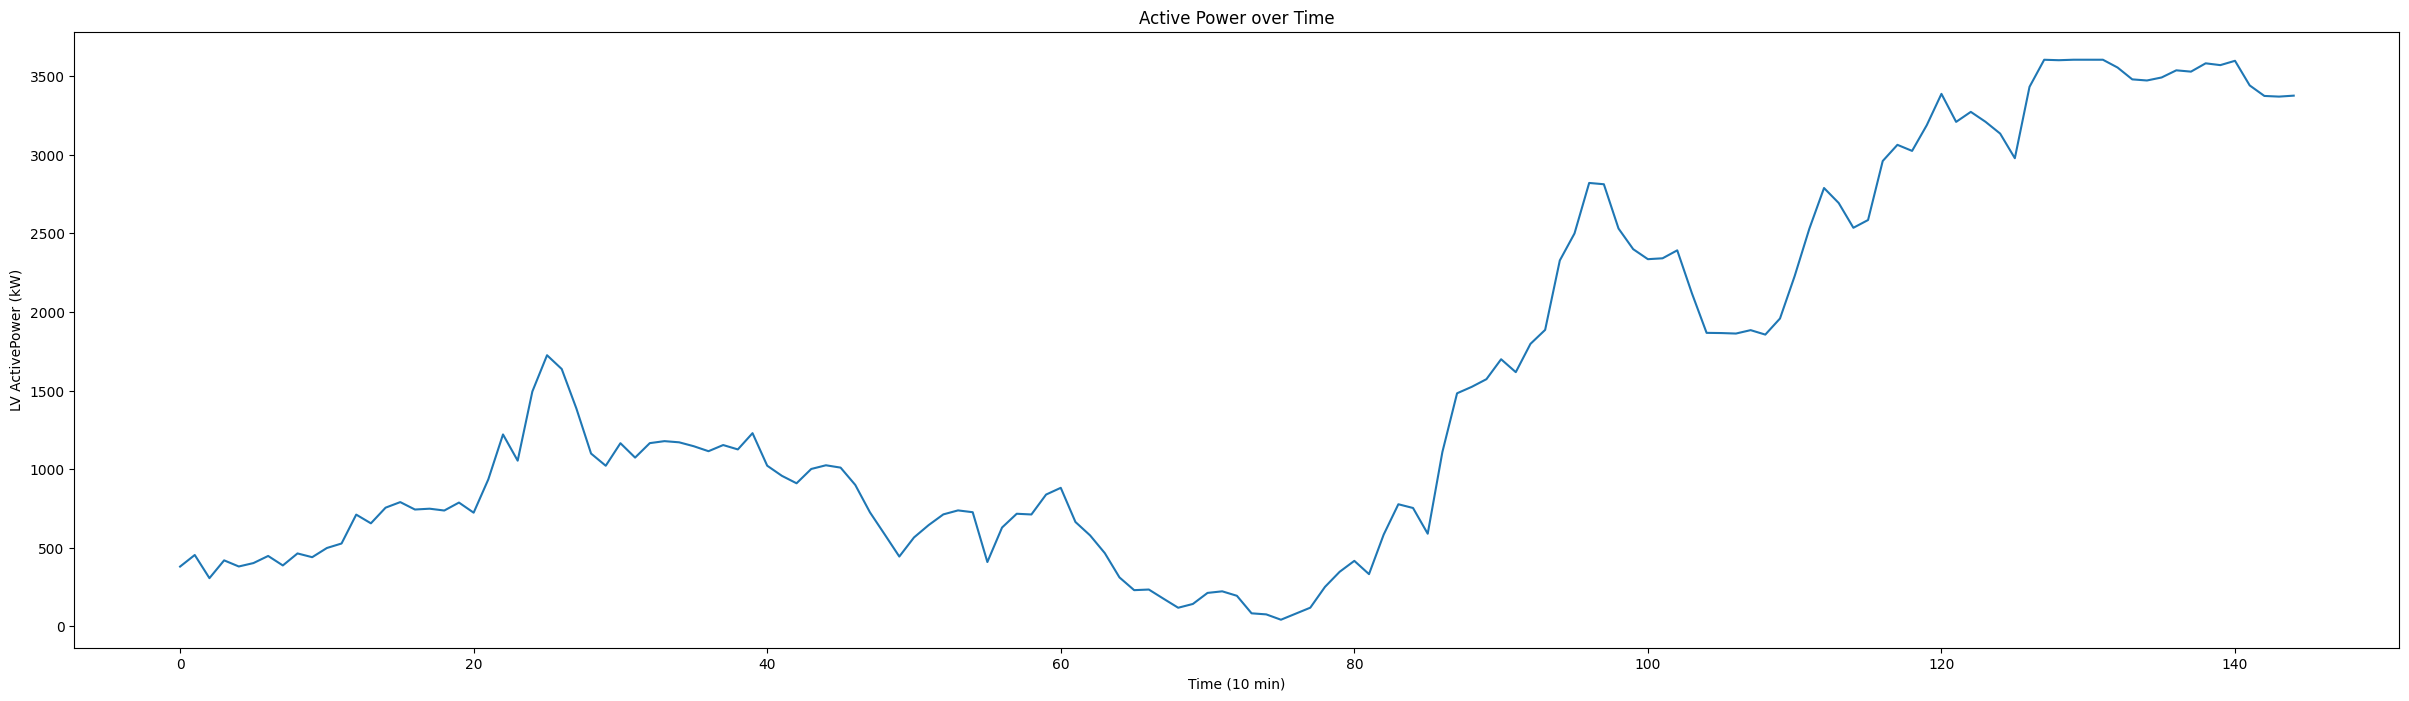

In [ ]:
start = 0
end = day_len

x = power_df.index
y = power_df['LV ActivePower (kW)']

plt.figure(figsize = (30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time (10 min)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Active Power over Time')

plt.show()

#### **Problem #1.2.3**

Create a similar plot, but for the first *week's* worth of data. **NOTE**: Do not worry about missing/dropped rows, simply use a full 7 days worth of data.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

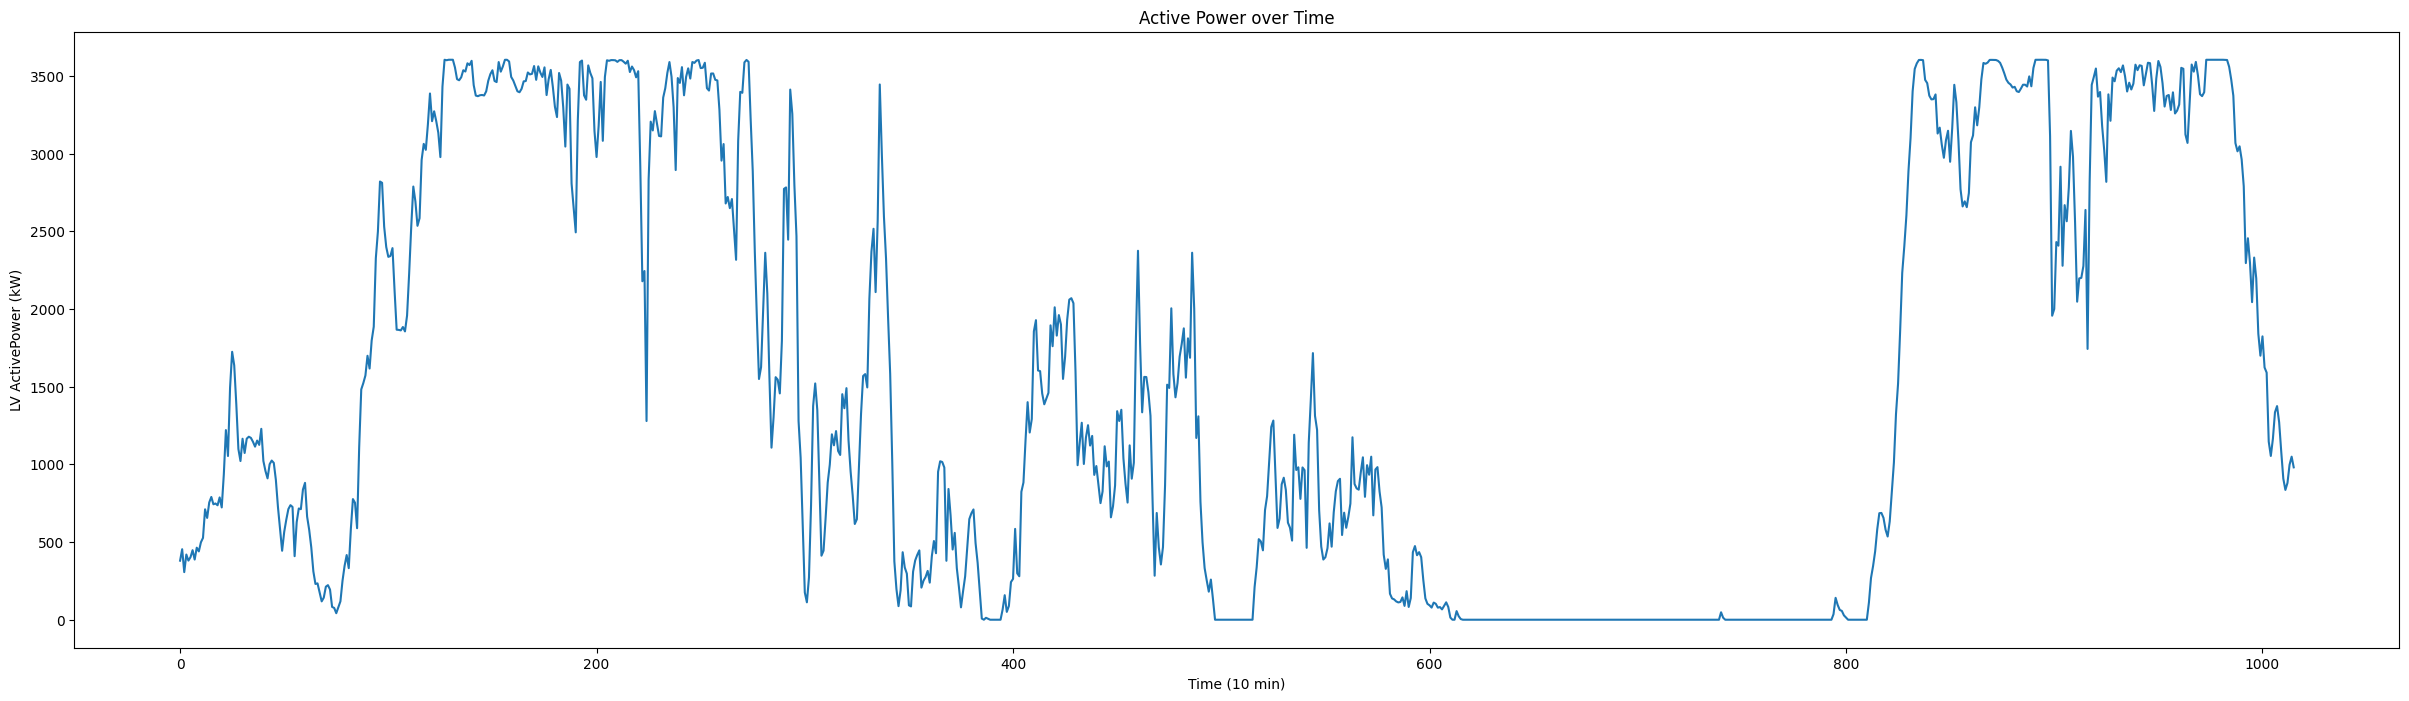

In [ ]:
start = 0
end = 7*day_len

x = power_df.index
y = power_df['LV ActivePower (kW)']

plt.figure(figsize = (30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time (10 min)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Active Power over Time')

plt.show()

#### **[OPTIONAL] Problem #1.2.4**

Read about the [matplotlib.pyplot.axvline(...) method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) and use it to create a vertical line on this plot at the beginning of each day.

<br>

**NOTE**: We recommend that you skip this problem for now and come back later if you're curious.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

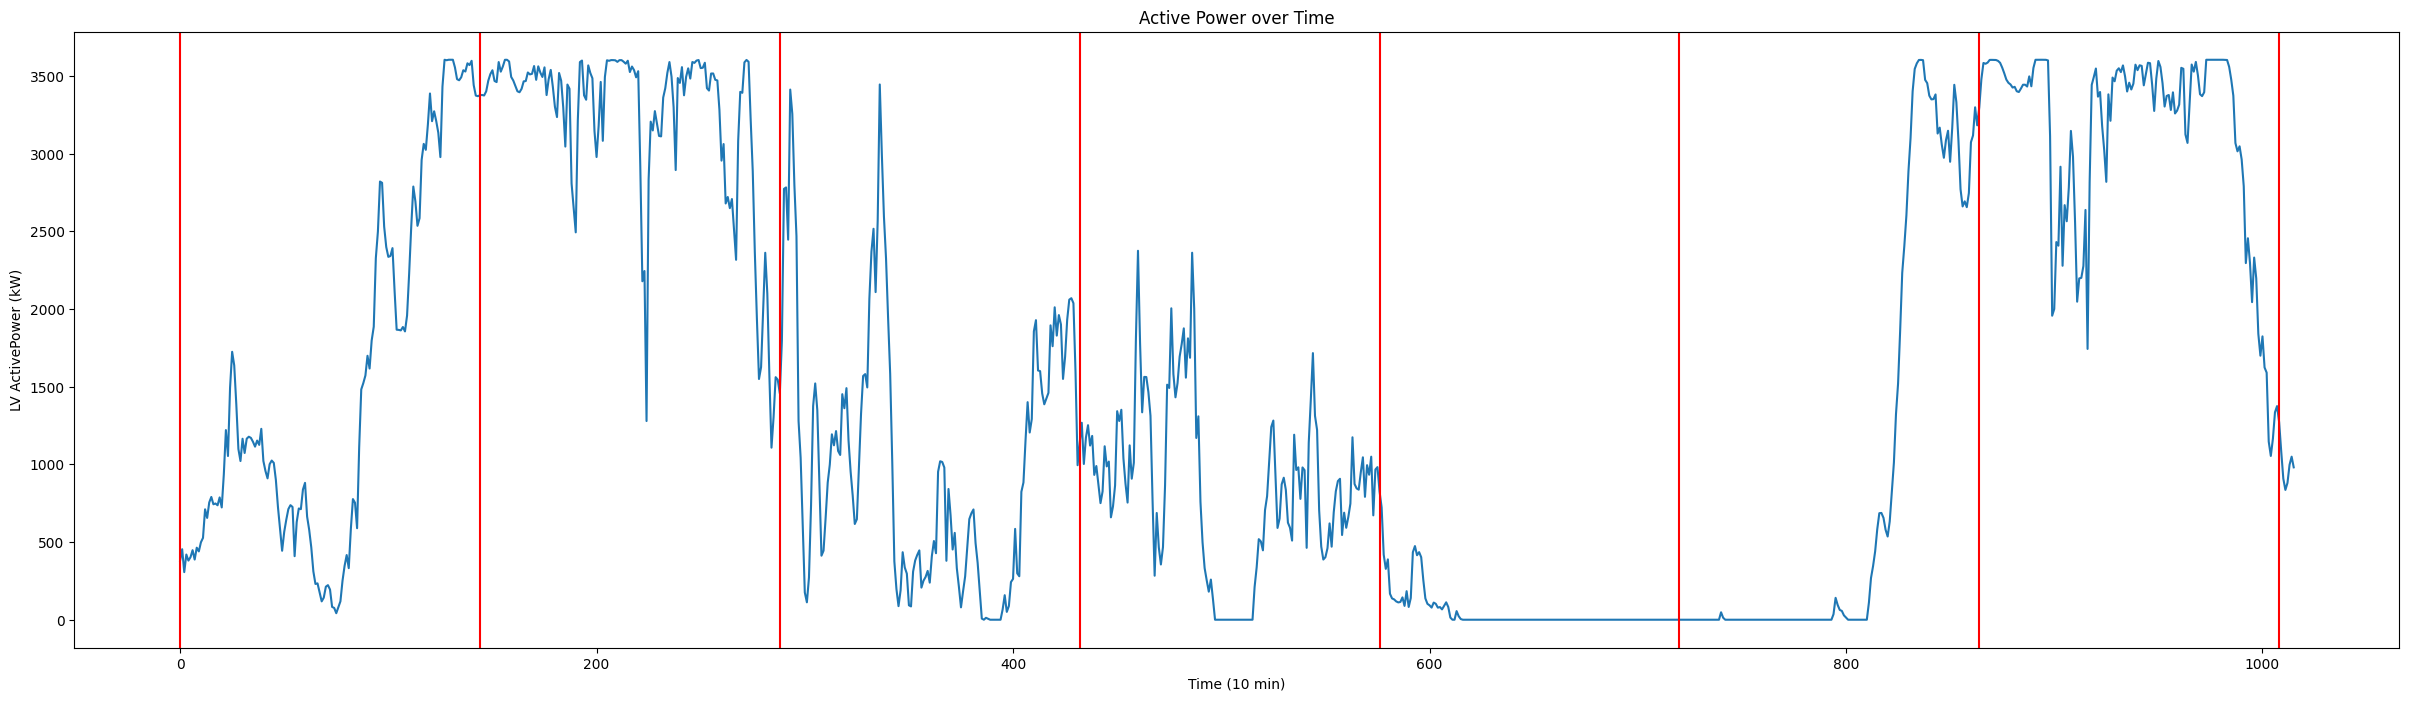

In [ ]:
start = 0
end = 7*day_len

x = power_df.index
y = power_df['LV ActivePower (kW)']

plt.figure(figsize = (30, 8))
plt.plot(x[start:end], y[start:end])

for time in range(start, end + day_len, day_len):
  plt.axvline(time, c = 'red')

plt.xlabel('Time (10 min)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Active Power over Time')

plt.show()

#### **Problem #1.2.5**

Create a similar plot, but for the first week's worth of `Wind Speed (m/s)` data on the y axis.

<br>

**NOTE**: You *do not* need to include vertical lines.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

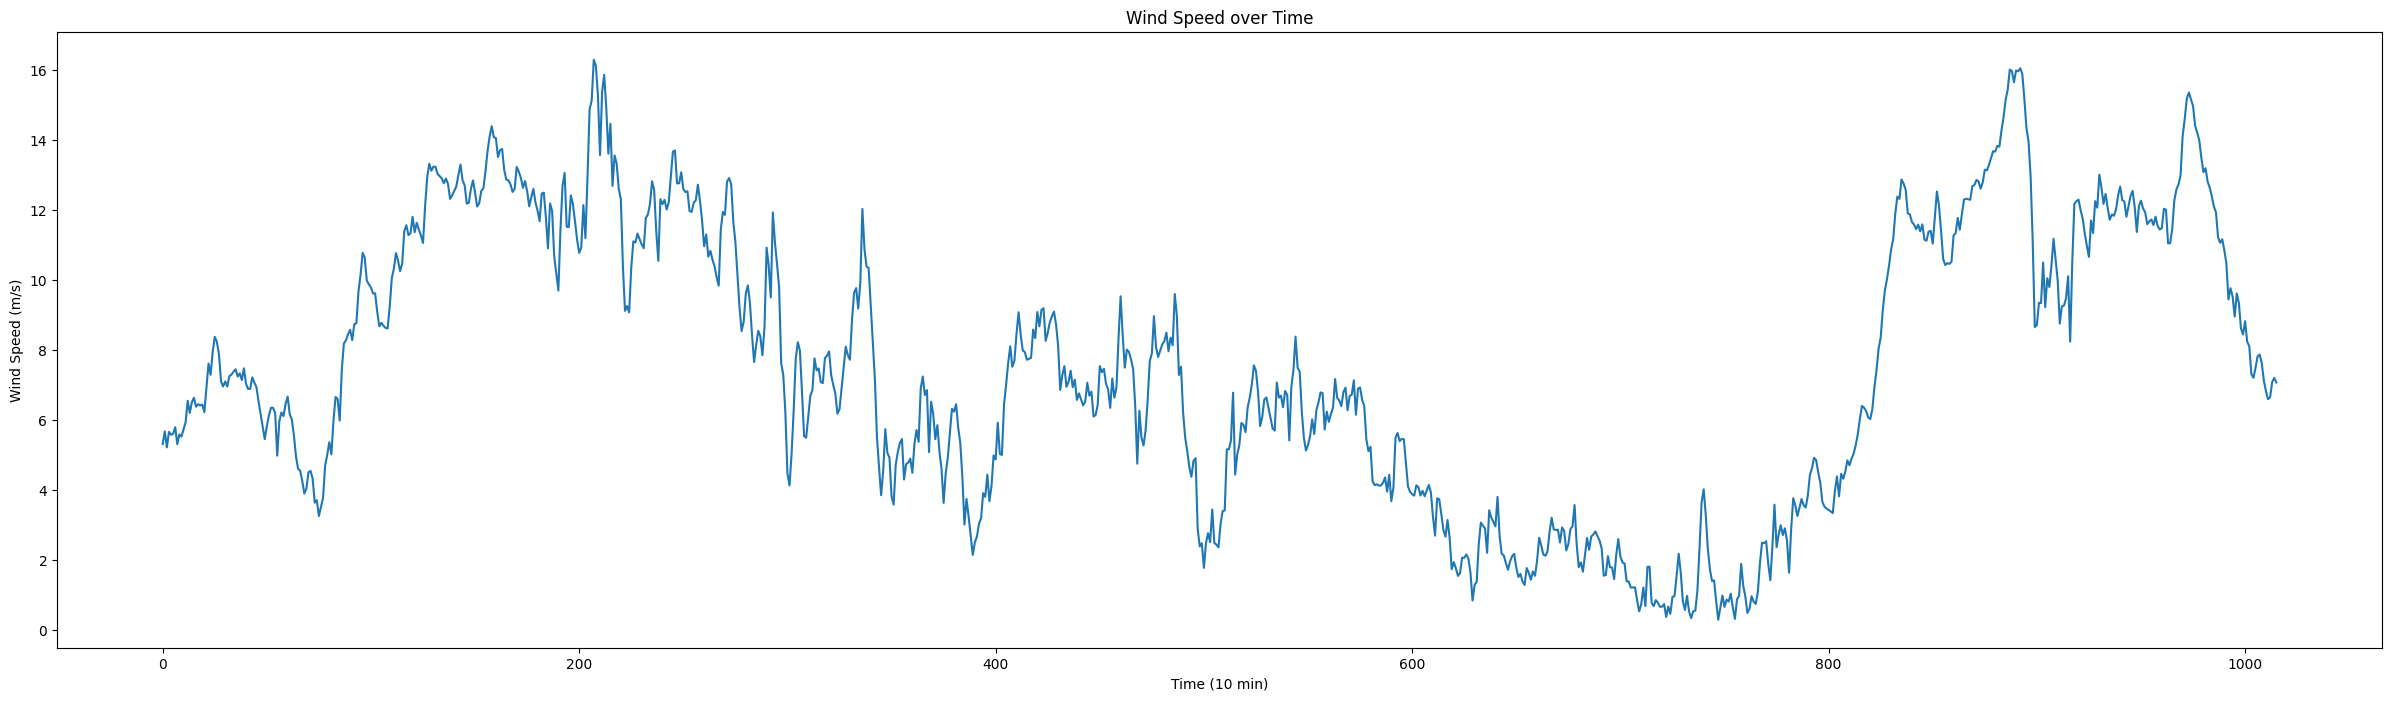

In [ ]:
start = 0
end = 7*day_len

x = power_df.index
y = power_df['Wind Speed (m/s)']

plt.figure(figsize = (30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time (10 min)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed over Time')

plt.show()

#### **Problem #1.2.6**

Create a similar plot, but for the first week's worth of `Wind Direction (°)` data on the y axis.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

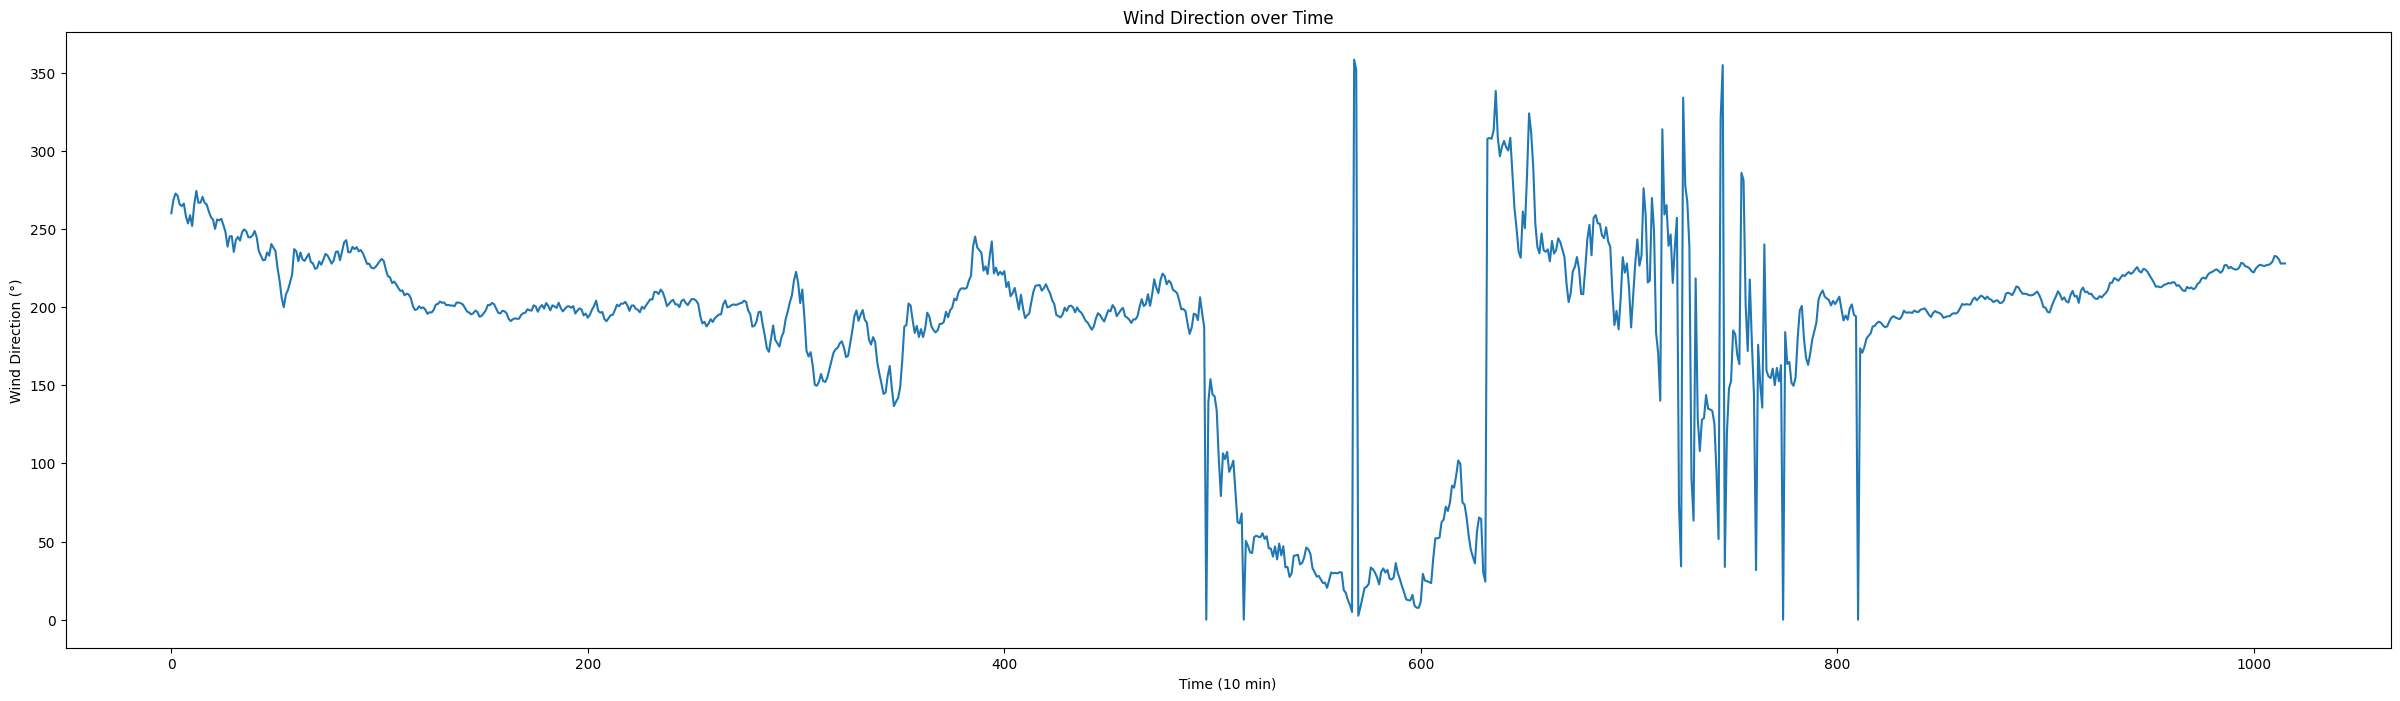

In [ ]:
start = 0
end = 7*day_len

x = power_df.index
y = power_df['Wind Direction (°)']

plt.figure(figsize = (30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time (10 min)')
plt.ylabel('Wind Direction (°)')
plt.title('Wind Direction over Time')

plt.show()

#### **Problem #1.2.7**

Now, create a plot to see the relationship between `LV ActivePower (kW)` and `Wind Speed (m/s)`.

<br>

**NOTE**: We will be using `LV ActivePower (kW)` as our label, so it is natural (but not strictly required) to use this as the y variable.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

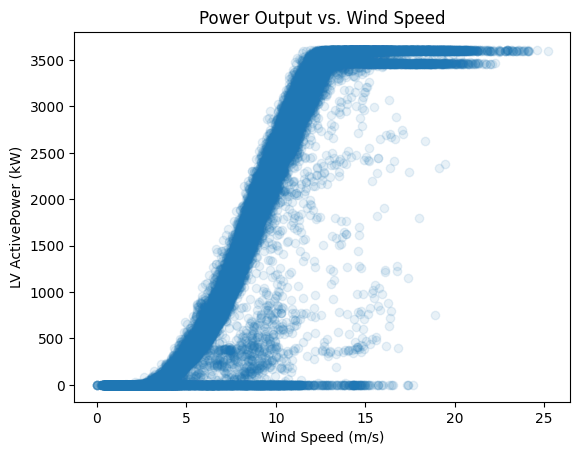

In [ ]:
plt.scatter(power_df['Wind Speed (m/s)'], power_df['LV ActivePower (kW)'], alpha = 0.1)

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Power Output vs. Wind Speed')

plt.show()

#### **Problem #1.2.8**

Create a plot to see the relationship between `LV ActivePower (kW)` and `Wind Direction (°)`.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

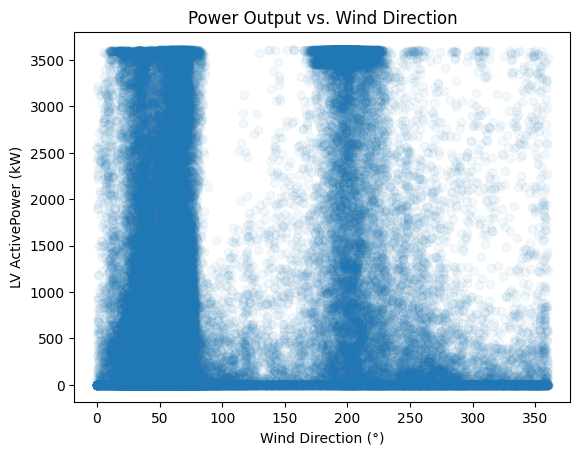

In [ ]:
plt.scatter(power_df['Wind Direction (°)'], power_df['LV ActivePower (kW)'], alpha = 0.05)

plt.xlabel('Wind Direction (°)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Power Output vs. Wind Direction')

plt.show()

#### **Problem #1.2.9**

Create a plot to see the relationship between `LV ActivePower (kW)` and `Theoretical_Power_Curve (KWh)`.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

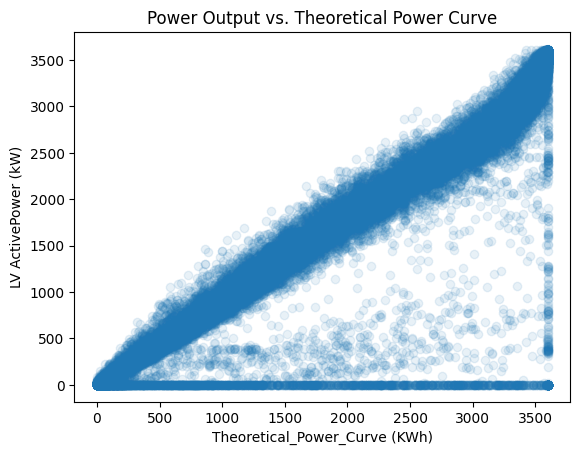

In [ ]:
plt.scatter(power_df['Theoretical_Power_Curve (KWh)'], power_df['LV ActivePower (kW)'], alpha = 0.1)

plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Power Output vs. Theoretical Power Curve')

plt.show()

#### **Problem #1.2.10**

It's common that during data visualization, certain aspects of the data will become clear that warrant further modification of the data. In this particular case, these plots have highlighted several aspects of the data that we should consider in our modeling:

1. When `LV ActivePower (kW)` is 0, the other variables can take on a very wide range of values. This is *likely* a sign that we cannot trust the data when `LV ActivePower (kW)` is 0 since it seems to have very little relationship to the other variables, which is not particularly realistic. **NOTE**: This is can be seen by a straight horizontal line of data running along the bottom of the x axis.

2. Similarly, when `Theoretical_Power_Curve (KWh)` is at its maximum, the other variables can take on a wide range of values. **NOTE**: This can be seen by a straight vertical line of data running along the right side of the graph with `Theoretical_Power_Curve (KWh)`.


<br>

Complete the code below to verify the two patterns described above and that this *doesn't* occur for the other variables. **NOTE**: We have provided you the code for `LV ActivePower (kW)` to get you started.

##### **`LV ActivePower (kW)`**

In [ ]:
rows_to_examine = power_df['LV ActivePower (kW)'] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,10781.0,10781.000000,10781.000000,10781.000000
mean,0.0,3.121525,257.199356,153.527840
std,0.0,2.472904,729.154681,111.094082
min,0.0,0.000000,0.000000,0.000000
25%,0.0,1.738193,0.000000,51.330460
50%,0.0,2.475772,0.000000,125.123703
75%,0.0,3.270413,30.503065,253.854904
max,0.0,17.669189,3600.000000,359.987396


In [ ]:
rows_to_examine = power_df['LV ActivePower (kW)'] == power_df['LV ActivePower (kW)'].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.00000,1.00000,1.0,1.000000
mean,3618.73291,17.91428,3600.0,156.281097
std,NaN,NaN,NaN,NaN
min,3618.73291,17.91428,3600.0,156.281097
25%,3618.73291,17.91428,3600.0,156.281097
50%,3618.73291,17.91428,3600.0,156.281097
75%,3618.73291,17.91428,3600.0,156.281097
max,3618.73291,17.91428,3600.0,156.281097


##### **`Theoretical_Power_Curve (KWh)`**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
rows_to_examine = power_df['Theoretical_Power_Curve (KWh)'] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,7709.000000,7709.000000,7709.0,7709.000000
mean,0.483546,1.974394,0.0,167.499621
std,3.082011,0.682187,0.0,111.056835
min,0.000000,0.000000,0.0,0.000000
25%,0.000000,1.478889,0.0,63.985470
50%,0.000000,2.071992,0.0,158.412399
75%,0.000000,2.547601,0.0,268.348206
max,85.393623,2.999583,0.0,359.987396


In [ ]:
rows_to_examine = power_df['Theoretical_Power_Curve (KWh)'] == power_df['Theoretical_Power_Curve (KWh)'].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,5454.000000,5454.000000,5454.0,5454.000000
mean,3450.001670,15.682668,3600.0,148.673418
std,591.480388,2.258319,0.0,72.649248
min,0.000000,13.000690,3600.0,0.000000
25%,3538.521240,13.819595,3600.0,66.625858
50%,3600.296020,15.053465,3600.0,188.997551
75%,3602.609802,17.118750,3600.0,201.193077
max,3618.732910,25.206011,3600.0,357.279205


##### **`Wind Speed (m/s)`**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
rows_to_examine = power_df['Wind Speed (m/s)'] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,10.0,10.0,10.0,10.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


In [ ]:
rows_to_examine = power_df['Wind Speed (m/s)'] == power_df['Wind Speed (m/s)'].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.000000,1.000000,1.0,1.0000
mean,3600.780029,25.206011,3600.0,202.9702
std,NaN,NaN,NaN,NaN
min,3600.780029,25.206011,3600.0,202.9702
25%,3600.780029,25.206011,3600.0,202.9702
50%,3600.780029,25.206011,3600.0,202.9702
75%,3600.780029,25.206011,3600.0,202.9702
max,3600.780029,25.206011,3600.0,202.9702


##### **`Wind Direction (°)`**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
rows_to_examine = power_df['Wind Direction (°)'] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,75.000000,75.000000,75.000000,75.0
mean,1.179799,4.858350,768.584730,0.0
std,7.662038,3.780623,1079.261911,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.739762,0.000000,0.0
50%,0.000000,4.436895,208.760611,0.0
75%,0.000000,7.552580,1285.365695,0.0
max,60.581200,17.411289,3600.000000,0.0


In [ ]:
rows_to_examine = power_df['Wind Direction (°)'] == power_df['Wind Direction (°)'].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.000000,1.00000,1.00000,1.000000
mean,3526.177002,12.44361,3574.67271,359.997589
std,NaN,NaN,NaN,NaN
min,3526.177002,12.44361,3574.67271,359.997589
25%,3526.177002,12.44361,3574.67271,359.997589
50%,3526.177002,12.44361,3574.67271,359.997589
75%,3526.177002,12.44361,3574.67271,359.997589
max,3526.177002,12.44361,3574.67271,359.997589


<a name="p2"></a>

---
## **Part 2: Modeling `LV ActivePower (kW)`**
---

In this part, you will use linear regression to model `LV ActivePower (kW)` following our 8 step model implementation process.

<a name="p2.1"></a>

---
### **Part 2.1: Using the Data as Is**
---

Let's start by working with the data as is, instead of considering any adjustments based on Problem #1.2.10 (which you can do in the optional section at the end).

#### **Step #1: Load in the data**

This step was completed above.

#### **Step #2: Decide independent and dependent variables**

`LV ActivePower (kW)` is our label (dependent variable) and every other variable other than `Date/Time` will make up our features.

In [ ]:
x = # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
x = power_df[['Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
y = power_df['LV ActivePower (kW)']

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### **Step #4: Import the algorithm**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the model and set hyperparameters**

For linear regression, there are no hyperparameters to set.

In [ ]:
model_1 = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model_1 = LinearRegression()

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.# COMPLETE THIS LINE TO TRAIN
predictions = # COMPLETE THIS LINE TO PREDICT

###### **Solution**

In [ ]:
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

##### **2. Visualize the results.**

Compare the true test values versus the predicted values.

###### **Solution**

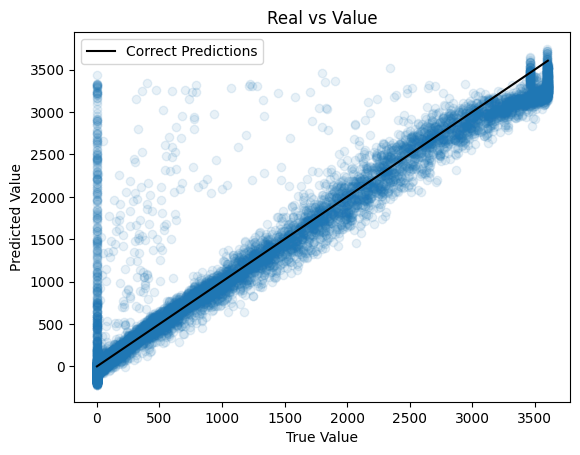

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

#### **Step #7: Evaluate the model's performance**

Specifically,

1. Use $\text{R}^2$, $\text{MSE}$, and $\text{MAE}$ to evaluate this model.

2. Visualize and interpret the residuals.

##### **1. Use $\text{R}^2$, $\text{MSE}$, and $\text{MAE}$ to evaluate this model.**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.9079073265390113
MSE: 158857.77542790084
MAE: 185.8866099191212


##### **2. Visualize and interpret the residuals.**

Plot the residuals for each test point and confirm that they are randomly distributed around 0.

In [ ]:
residuals = # COMPLETE THIS LINE

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

###### **Solution**

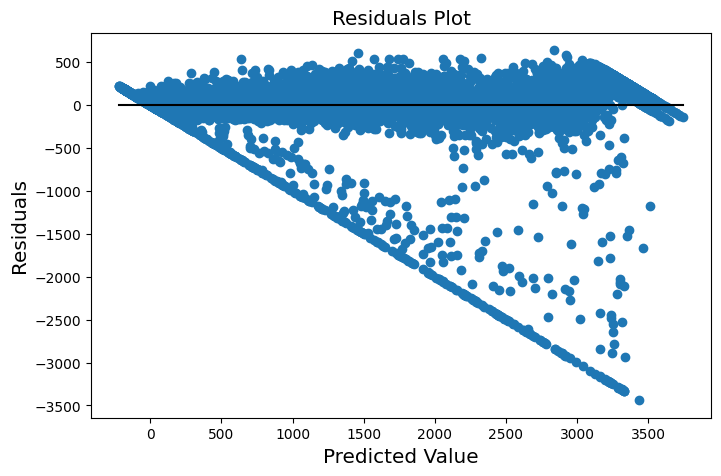

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Step #8: Use the model**

Specifically,

1. Predict the power output for the three three provided data points.

2. Compare these values to the minimum, average, and maximum outputs.

3. Visualize the modeled relationship between `LV ActivePower (kW)` and each of the three features used to see if a qualitative relationship can be inferred.

4. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the power output for the following data points:**

* **Data Point 1: The Minimum** - Each feature for this data point should be the minimum possible value found in the dataset.
* **Data Point 2: The Average** - Each feature for this data point should be the average value found in the dataset.
* **Data Point 3: The Maximum** - Each feature for this data point should be the maximum value found int he dataset.

<br>

**NOTE**: There are several ways to accomplish this, with the easiest relying on pandas methods.

In [ ]:
new_data = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

print(model_1.predict(# COMPLETE THIS LINE

###### **Solution**

In [ ]:
x.describe()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50473.000000,50473.000000,50473.000000
mean,7.563317,1493.846082,123.648102
std,4.226509,1367.885865,93.446383
min,0.000000,0.000000,0.000000
25%,4.210382,163.084179,49.304878
50%,7.111886,1067.161300,73.660377
75%,10.303410,2966.774233,201.684006
max,25.206011,3600.000000,359.997589


In [ ]:
new_data = pd.DataFrame([x.min(), x.mean(), x.max()], columns = X_test.columns)

model_1.predict(new_data)

array([-248.41127996, 1308.98727973, 3839.7319956 ])

##### **2. Compare these values to the minimum, average, and maximum outputs.**

Find the minimum, average, and maximum for `LV ActivePower (kW)` and compare to the predicted values above.

<br>

**NOTE**: These are not exactly the actual values we should expect for the data points above, but they are a good way to *loosely* check our model in this case.

In [ ]:
y.describe()

count    50473.000000
mean      1309.161489
std       1312.463427
min          0.000000
25%         52.740540
50%        828.006714
75%       2484.364014
max       3618.732910
Name: LV ActivePower (kW), dtype: float64

##### **3. Visualize the modeled relationship between `LV ActivePower (kW)` and each of the three features used to see if a qualitative relationship can be inferred.**

Specifically, plot the predicted and actual values in the test set against each feature.

<br>

**NOTE**: Make sure to include proper axis labels, a title, and a legend.

###### **Solution**

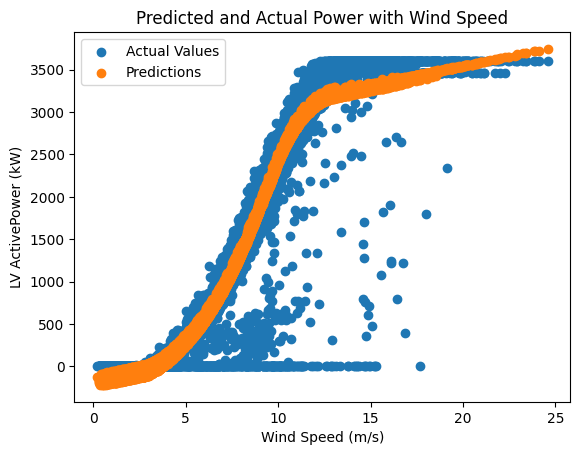

In [ ]:
plt.scatter(X_test["Wind Speed (m/s)"], y_test, label = 'Actual Values')
plt.scatter(X_test["Wind Speed (m/s)"], predictions, label = 'Predictions')

plt.title('Predicted and Actual Power with Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')

plt.legend()
plt.show()

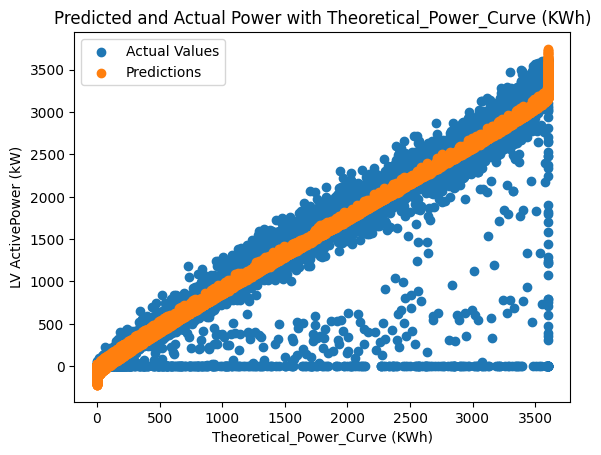

In [ ]:
plt.scatter(X_test["Theoretical_Power_Curve (KWh)"], y_test, label = 'Actual Values')
plt.scatter(X_test["Theoretical_Power_Curve (KWh)"], predictions, label = 'Predictions')

plt.title('Predicted and Actual Power with Theoretical_Power_Curve (KWh)')
plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')

plt.legend()
plt.show()

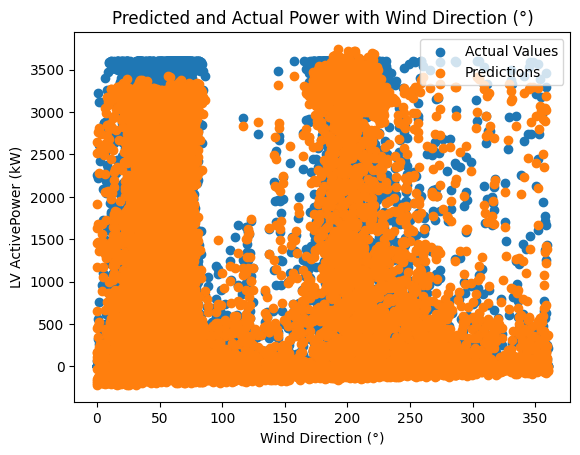

In [ ]:
plt.scatter(X_test["Wind Direction (°)"], y_test, label = 'Actual Values')
plt.scatter(X_test["Wind Direction (°)"], predictions, label = 'Predictions')

plt.title('Predicted and Actual Power with Wind Direction (°)')
plt.xlabel('Wind Direction (°)')
plt.ylabel('LV ActivePower (kW)')

plt.legend()
plt.show()

##### **4. Complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ['LV ActivePower (kW)'])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

###### **Solution**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ['LV ActivePower (kW)'])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,44.397123,0.784223,0.405184


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,LV ActivePower (kW)
0,-248.41128


<a name="p2.2"></a>

---
### **[OPTIONAL] Part 2.2: Attempting to Improve the Model**
---

In this challenging, optional section, you can work through several ways to *attempt* improving the model by considering the nature of this particular dataset.

#### **Problem #2.2.1**

Let's start by addressing what we observed in Problem #1.2.10. Specifically,
1. Drop any data points where `LV ActivePower (kW)` is 0 or `Theoretical_Power_Curve (KWh)` is at its maximum from the features and labels used for modeling.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Select only valid data points
power_df = power_df[power_df['LV ActivePower (kW)'] != 0]
power_df = power_df[power_df['Theoretical_Power_Curve (KWh)'] != power_df['Theoretical_Power_Curve (KWh)'].max()]

# Steps #2 - 7
x = # COMPLETE THIS CODE
y = # COMPLETE THIS CODE

X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS CODE

model_2 = # COMPLETE THIS CODE
model_2.fit(# COMPLETE THIS CODE
predictions = # COMPLETE THIS CODE

print("R2: " + str(# COMPLETE THIS CODE
print("MSE: " + str(# COMPLETE THIS CODE
print("MAE: " + str(# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# Select only valid data points
power_df = power_df[power_df['LV ActivePower (kW)'] != 0]
power_df = power_df[power_df['Theoretical_Power_Curve (KWh)'] != power_df['Theoretical_Power_Curve (KWh)'].max()]


# Steps #2 - 7
x = power_df[['Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
y = power_df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.9478033630840538
MSE: 63079.784824254435
MAE: 129.9723068371016


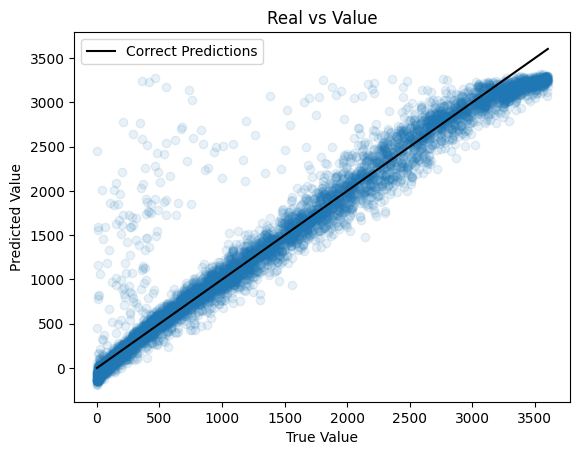

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

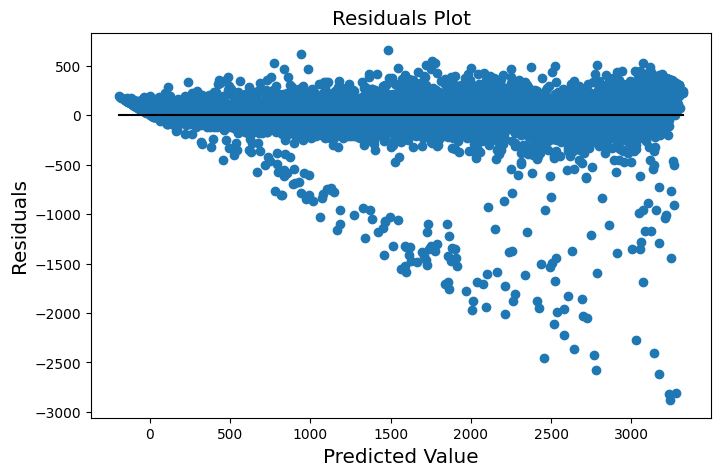

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Problem #2.2.2**

You should have seen an improvement in the results, but still noticed a few items of concern. In particular, notice that the residuals plot is *almost* equally distributed around 0 *except* points that form a nearly straight line changing with predicted value. This was present before, but the fixes in Problem #2.2.1 did not seem to completely address this "oddity".

<br>

This is likely due to the role that *time* plays in our data. This creates complex, correlated relationships between data points meaning that the order of data matters--something that very few models are built to handle. This kind of data, known formally as [time series data](https://en.wikipedia.org/wiki/Time_series), actually requires much deeper and specific statistical tools than what we will explore in this course. However, we can try several different ways of dealing with time.


Let's start by simply including time as a feature so that perhaps our model can learn about it. Specifically,

1. In the modified DataFrame from above, create a new feature called `Time (min)` that equals `power_df.index` times 10.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Create the Time (min) feature and perform Steps #2 - 7
power_df['Time (min)'] = # COMPLETE THIS CODE

# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# Create the Time (min) feature and perform Steps #2 - 7
power_df['Time (min)'] = power_df.index * 10

# Steps #2 - 7
x = power_df[['Time (min)', 'Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
y = power_df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.947815413766624
MSE: 63065.221539942846
MAE: 129.7861660004199


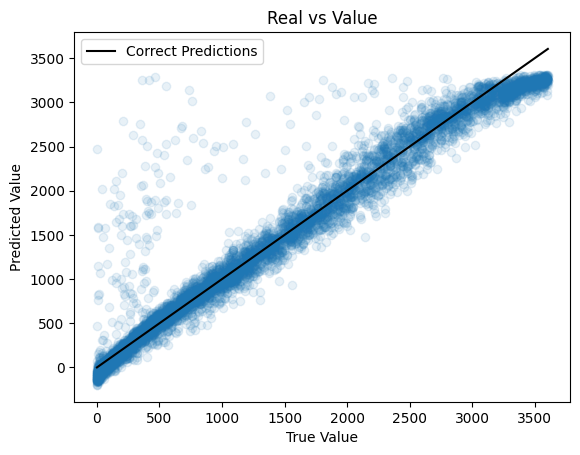

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

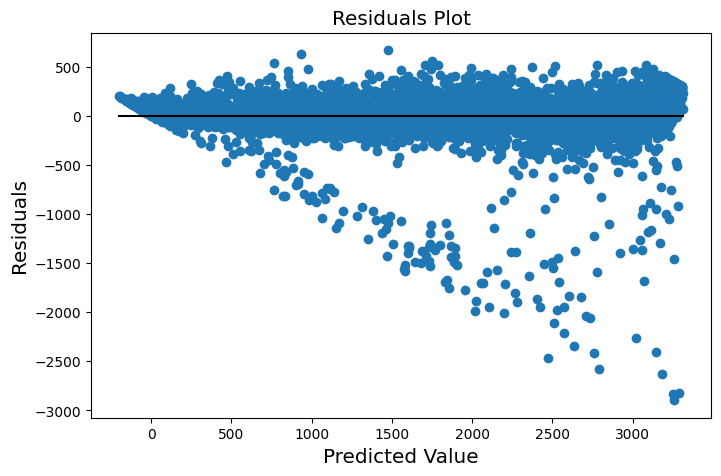

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Problem #2.2.3**

You likely noticed very little difference in the results. Simply including time as a feature is not enough. One aspect of more sophisticated approaches is to predict the *difference* between points instead of the values of the points themselves. This is commonly known as [integration](https://en.wikipedia.org/wiki/Order_of_integration), [lag, or backshift](https://en.wikipedia.org/wiki/Lag_operator).

While the theory behind this can get complex, we can implement it quite simply using the [`.shift(...)` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) built into DataFrames that shifts data by a given number of rows.

<br>

Let's use the `.shift(...)` method to predict the difference in data points. Specifically,

1. Instead of `x` and `y`, prepare the variables `x_diffs` and `y_diffs` as our data for modeling such that they represent a shift of 1 row in the `x` and `y` data *without the `Time (min)` variable*.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7
x = # COMPLETE THIS CODE
x_diffs = x - x.shift(1)
x_diffs = x_diffs.dropna(how='any')

y = # COMPLETE THIS CODE
y_diffs = # COMPLETE THIS CODE
y_diffs = # COMPLETE THIS CODE

# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7
x = power_df[['Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
x_diffs = x - x.shift(1)
x_diffs = x_diffs.dropna(how='any')

y = power_df['LV ActivePower (kW)']
y_diffs = y - y.shift(1)
y_diffs = y_diffs.dropna(how='any')


# Steps #2 - 7
X_train, X_test, y_train, y_test = train_test_split(x_diffs, y_diffs, test_size = 0.2, random_state = 42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.7288380242221262
MSE: 22878.967381281946
MAE: 64.75826691421902


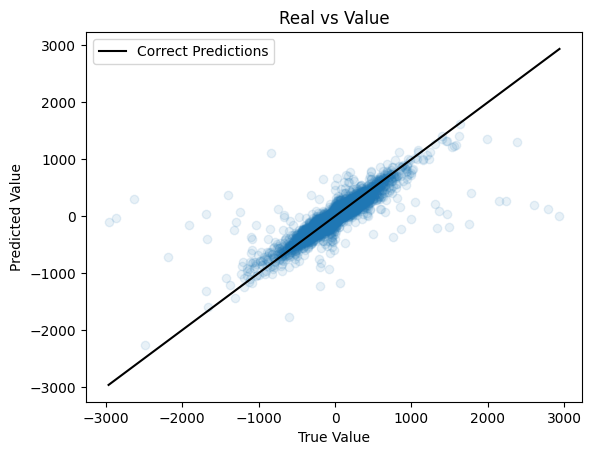

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

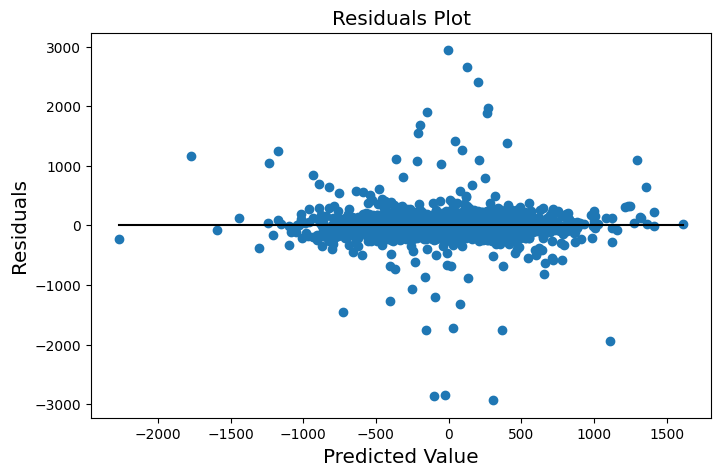

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Problem #2.2.4**

You should have seen interesting results where the $\text{R}^2$ went down (around 0.72), but all other measures of model performance improved. However, an $\text{R}^2 > 0.7$ is still considered good in practice, particularly given the other markers of success and the many layers of consideration that have been included in our model.

From here, it is a matter of adjusting the exact shift we use and eventually moving onto even more advanced methods such as [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average).

<br>

In the space below, explore how changing the amount of shift impacts the model's performance.

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7

# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

##### **Solution**

Shifting by 2

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7
shift_amount = 2

x = power_df[['Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
x_diffs = x - x.shift(shift_amount)
x_diffs = x_diffs.dropna(how='any')

y = power_df['LV ActivePower (kW)']
y_diffs = y - y.shift(shift_amount)
y_diffs = y_diffs.dropna(how='any')


# Steps #2 - 7
X_train, X_test, y_train, y_test = train_test_split(x_diffs, y_diffs, test_size = 0.2, random_state = 42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.8154630986503667
MSE: 28255.748541677418
MAE: 79.77772060313366


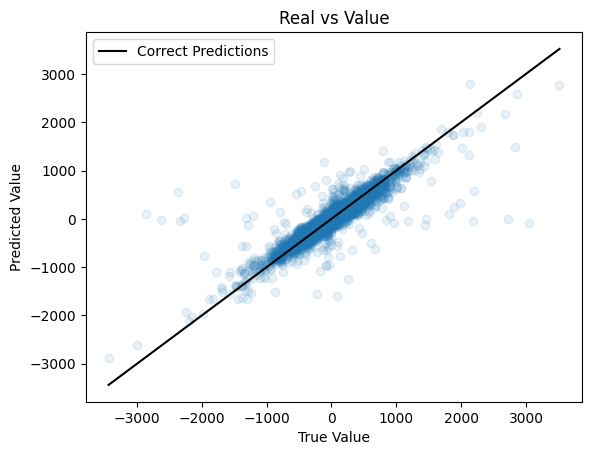

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

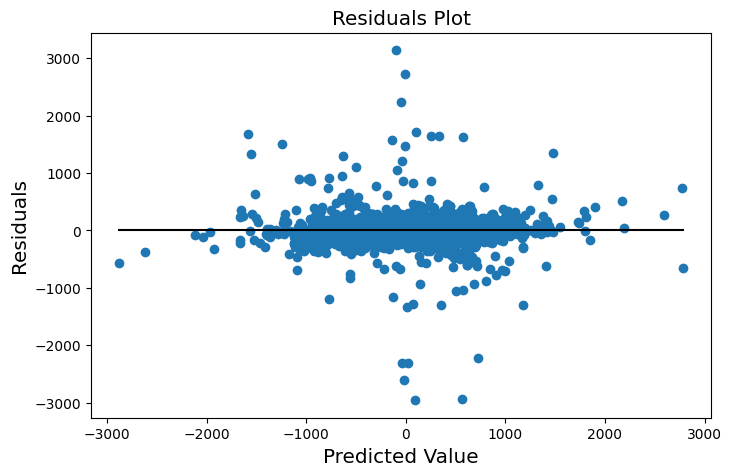

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

##### **Solution**

Shifting by 10

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7
shift_amount = 10

x = power_df[['Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
x_diffs = x - x.shift(shift_amount)
x_diffs = x_diffs.dropna(how='any')

y = power_df['LV ActivePower (kW)']
y_diffs = y - y.shift(shift_amount)
y_diffs = y_diffs.dropna(how='any')


# Steps #2 - 7
X_train, X_test, y_train, y_test = train_test_split(x_diffs, y_diffs, test_size = 0.2, random_state = 42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.8853395707453925
MSE: 55795.9890072831
MAE: 117.4744536833611


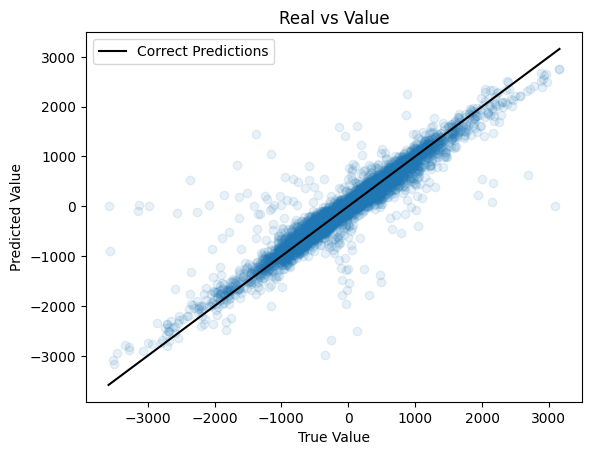

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

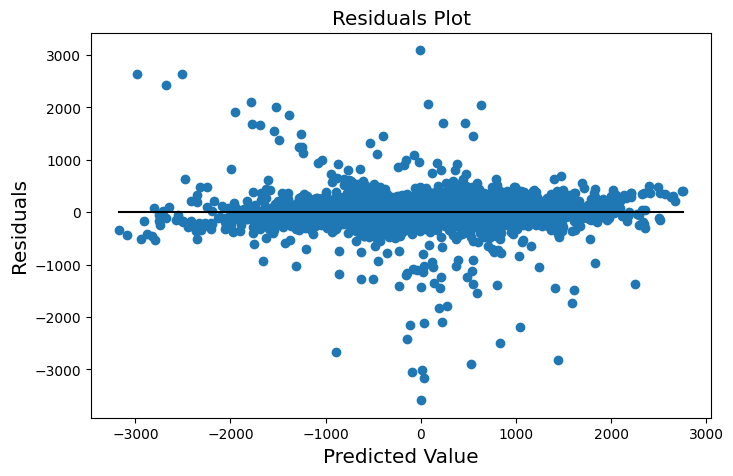

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

##### **Solution**

Shifting by `day_len`

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7
shift_amount = day_len

x = power_df[['Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)',	'Wind Direction (°)']]
x_diffs = x - x.shift(shift_amount)
x_diffs = x_diffs.dropna(how='any')

y = power_df['LV ActivePower (kW)']
y_diffs = y - y.shift(shift_amount)
y_diffs = y_diffs.dropna(how='any')


# Steps #2 - 7
X_train, X_test, y_train, y_test = train_test_split(x_diffs, y_diffs, test_size = 0.2, random_state = 42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.941434414029091
MSE: 118054.92567594232
MAE: 183.9256408035852


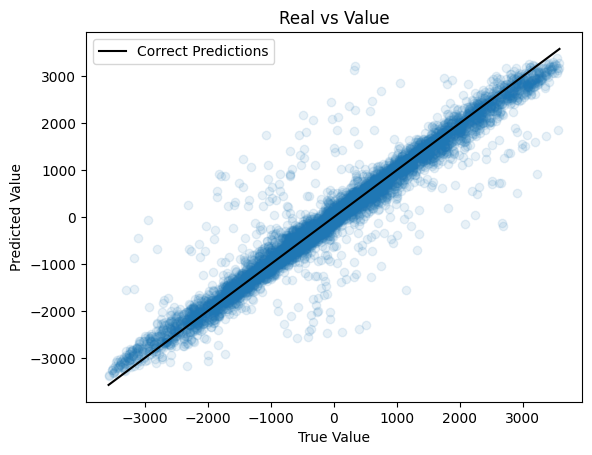

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions, alpha = 0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

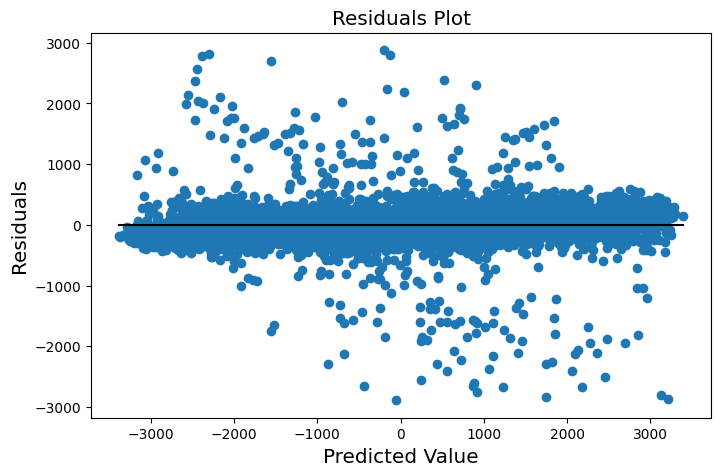

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

---
#End of Notebook

© 2023 The Coding School, All rights reserved